# 1. 변경된 prime time 코드 공유합니다. (기존 요일별 prime time에서 변경)
- 무형 데이터 분석한 결과 주말 18시와 19시 약 50%나 차지하고 있음
- sum으로 할 경우, 위의 시간대에 웨이트 값이 너무 낮게 도출됨. 
- 따라서 시간대별 매출액 sum을 하지 않고, 평균 매출액으로 prime time feature 사용.

# 2. 시간대별 상품군별 노출(분) 비율
- 특정 시간대에 특정 상품군이 어느 비중만큼 편성되어 있는지 나타내주는 feature
- 전처리에서 노출분 채워주는 부분을 생략해야 정확한 값이 나와서 그 부분 생략하고 진행했습니다!

# 3. 2번을 요일별로 나눠서 feature로 만들기


In [4]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform


# if platform.system() == 'Windows':
# # 윈도우인 경우
#     font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#     rc('font', family=font_name)
# else:    
# # Mac 인 경우
#     rc('font', family='AppleGothic')
    
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings(action = 'ignore') 


try:
    if platform.system()=="Windows":
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.ttf").get_name()
        rc("font",family=font_name)
    else:
        rc('font',family='AppleGothic')
except:
    pass

matplotlib.rcParams['axes.unicode_minus']=False

sales = pd.read_excel('sales.xlsx', header=1)
sales.head()

# 무형 지우기
sales.drop(sales[sales["상품군"]=="무형"].index, inplace=True)

# 판매단가 > 취급액 이면 취급액 = 0 

def custom(price, total):
    if price > total:
        return 0
    
    else:
        return total

sales["취급액"] = sales.apply(lambda x : custom(x["판매단가"], x["취급액"]), axis=1)

# 확인
print(sum((sales["판매단가"] > sales["취급액"]) & (sales['취급액'] != 0)))
sales

FileNotFoundError: [Errno 2] No such file or directory: 'sales.xlsx'

In [ ]:
# month, day, hour, minute, weekday 열 추가
sales['month'] = pd.DatetimeIndex(sales['방송일시']).month
sales['day'] = pd.DatetimeIndex(sales['방송일시']).day
sales['hour'] = pd.DatetimeIndex(sales['방송일시']).hour
sales['minute'] = pd.DatetimeIndex(sales['방송일시']).minute
sales['weekday'] = pd.DatetimeIndex(sales['방송일시']).weekday
sales['방송날짜'] = pd.DatetimeIndex(sales['방송일시']).date

sales

In [326]:
# 무형이면서 주말 18,19시에 방송한 노출분을 확인해보자. 

# a = sales[sales["상품군"]=="무형"]
# b = a[a['weekday'].isin([5])]   
# c = b[b['hour'].isin([18,19])]
# c.sum()

# 1. 요일별 prime time 새로 만들기 

- 우선, 요일 나누지 말고 그래프를 그려보자.

In [327]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01


In [350]:
# 일단, day 마다 hour를 기준으로 매출액이 sum 될 수 있도록 groupby 해줌.

processed = pd.DataFrame(sales.groupby(['month', 'day','hour'])['취급액'].sum()).reset_index()

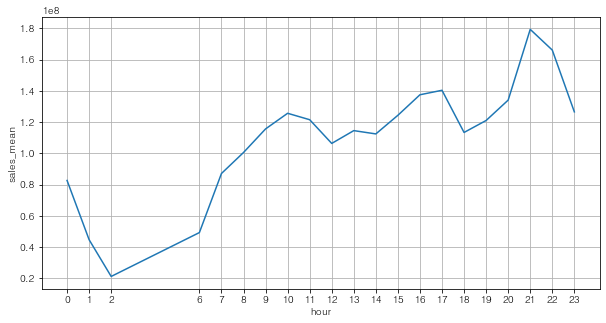

In [351]:
# hour 기준으로 모든 일의 취급액을 mean 해주기. -> 시간대별 평균 매출액 

hour_df = pd.DataFrame(processed.groupby(['hour'])['취급액'].mean())

# 그래프로 그려보기 

plt.figure(figsize = (10,5))
plt.plot(hour_df.index, hour_df['취급액'])
plt.xlabel("hour")
plt.ylabel("sales_mean")
plt.xticks(hour_df.index)
plt.grid()
plt.show()

# 요일별로 나눠서 시간대별 매출액(sum) 구하기-> feature로 활용하기

In [1]:
# day 마다 hour를 기준으로 매출액이 sum 될 수 있도록 groupby 해줌. weekday도 필요하니까 같이 

processed1 = pd.DataFrame(sales.groupby(['month', 'day','hour','weekday'])['취급액'].sum()).reset_index()
processed1.head()

NameError: name 'pd' is not defined

In [353]:
# hour, weekday 기준으로 모든 일의 취급액을 mean 해주기. -> 요일별 시간대별 평균 매출액 

# hour_df1 = pd.DataFrame(processed1.groupby(['hour', 'weekday'])['취급액'].mean()).reset_index()
# hour_df1.head()

,hour,weekday,취급액
0,0,0,9.147178e+07
1,0,1,7.046906e+07
2,0,2,8.733644e+07
3,0,3,8.779026e+07
4,0,4,8.632919e+07


# feature로 만들기 - sales에 merge

In [354]:
# column 이름 바꾸기
# hour_df1.rename(columns = {'취급액':'w_prime'}, inplace=True)

# sales = pd.merge(sales, hour_df1, on=['hour', 'weekday'])

# sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,w_prime
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,4.771683e+07
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,4.771683e+07
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,4.771683e+07
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,4.771683e+07
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,4.771683e+07


In [3]:
processed1 = pd.DataFrame(sales.groupby(['month', 'day','hour','weekday'])['취급액'].sum()).reset_index()

hour_df1 = pd.DataFrame(processed1.groupby(['hour', 'weekday'])['취급액'].mean()).reset_index().rename(columns = {'취급액':'w_prime'}, inplace=True)

sales = pd.merge(sales, hour_df1, on=['hour', 'weekday'])

sales.head()

NameError: name 'sales' is not defined

# 요일별 df 및 그래프로 확인하기


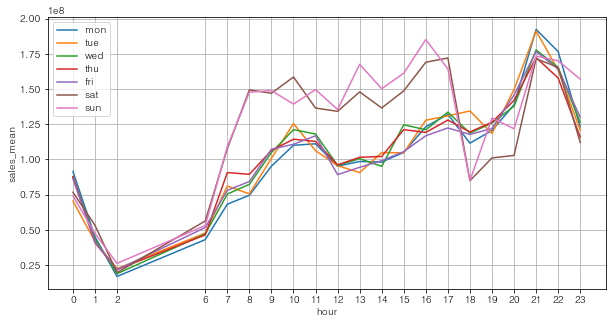

In [356]:
# 요일별로 필터 적용한 dataframe 만들기 

mon_df = hour_df1[hour_df1['weekday']==0]
tue_df = hour_df1[hour_df1['weekday']==1]
wed_df = hour_df1[hour_df1['weekday']==2]
thu_df = hour_df1[hour_df1['weekday']==3]
fri_df = hour_df1[hour_df1['weekday']==4]
sat_df = hour_df1[hour_df1['weekday']==5]
sun_df = hour_df1[hour_df1['weekday']==6]

# 그래프 그리기 

fig, ax = plt.subplots(figsize=(10,5)) 

# 평일 추이 그려보기. 
ax.plot(mon_df['hour'],mon_df['w_prime'], label='mon')
ax.plot(tue_df['hour'],tue_df['w_prime'], label='tue')
ax.plot(wed_df['hour'], wed_df['w_prime'], label='wed')
ax.plot(thu_df['hour'],thu_df['w_prime'], label='thu')
ax.plot(fri_df ['hour'],fri_df['w_prime'], label='fri')

# # 주말 추이도 그려보자. (갈색 - 토요일 / 핑크 - 일요일)
ax.plot(sat_df['hour'],sat_df['w_prime'], label='sat')
ax.plot(sun_df['hour'],sun_df['w_prime'], label='sun')

plt.xticks(mon_df['hour'])

plt.xlabel('hour')
plt.ylabel('sales_mean')
plt.grid()

plt.legend(loc='upper left')

# 2. 시간대별 상품군별 방송 노출 비율 feature로 넣기 
- 노출분이 매출액과 상관관계를 어느정도 보이고 있기 때문에 활용해보고자 한다. 

In [357]:
# 시간대별 방송 편성 노출분 feature 만들기 

broad_time = sales.groupby(['hour','상품군']).sum()['노출(분)']
bt_df= pd.DataFrame(broad_time)

bt_df = bt_df.rename(columns={'노출(분)' : 'prime_categ'}).reset_index()


# 시간대별 노출분 sum 구하기 
hour_sum = pd.DataFrame(bt_df.groupby('hour')['prime_categ'].sum()).reset_index()


# 시간대별 상품군별 노출분 column 합치기
btdf = pd.merge(bt_df,hour_sum, on="hour")

# 각각 상품군별 노출분을 시간대별 전체 노출분으로나눠주기. 즉 시간대별로 각 상품군이 몇퍼센트의 비율로 노출되었는지 보여줌. 
# prime_categ_x : 상품군별 노출분 칼럼
# prime_categ_y : 시간대별로 노출분 sum한것 

btdf['broad_rate'] = btdf['prime_categ_x'] / btdf['prime_categ_y']

# 잘 들어갔는지 확인 
# rate 다 더하면 1 
btdf[btdf['hour']==0].sum()

btdf

,hour,상품군,prime_categ_x,prime_categ_y,broad_rate
0,0,가구,540.000000,16546.266667,0.032636
1,0,가전,520.000000,16546.266667,0.031427
2,0,건강기능,380.000000,16546.266667,0.022966
3,0,농수축,105.466667,16546.266667,0.006374
4,0,생활용품,2100.000000,16546.266667,0.126917
...,...,...,...,...,...
209,23,의류,2920.000000,18397.466667,0.158718
210,23,이미용,1047.266667,18397.466667,0.056925
211,23,잡화,980.200000,18397.466667,0.053279
212,23,주방,700.000000,18397.466667,0.038049


In [358]:
# 필요 없는 column drop 

try :
    btdf.drop(['prime_categ_x', 'prime_categ_y'], inplace=True, axis=1)
    
except :
     print('change already done.')
        
btdf.head()

,hour,상품군,broad_rate
0,0,가구,0.032636
1,0,가전,0.031427
2,0,건강기능,0.022966
3,0,농수축,0.006374
4,0,생활용품,0.126917


In [359]:
# sales에 merge하기 

sales = pd.merge(sales, btdf)

# 잘 들어갔는지 확인 
# sales[sales['hour']==10]

sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,w_prime,broad_rate
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,4.771683e+07,0.283897
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,4.771683e+07,0.283897
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,4.771683e+07,0.283897
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,4.771683e+07,0.283897
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,4.771683e+07,0.283897


# 3. 2번을 더 세분화된 feature로 만들기 : 요일별로 만들기 

## 다른방법 -> 코딩 고민중....
- 월-목 / 금 / 토 / 일 -> 이렇게 크게 4가지로 묶어서 feature 만들어보고 싶은데 코딩 방법을 모름.. 

- 상품군별 비중 그래프를 요일별로 봤을때 추이가 비슷한것 끼리 묶었음
- 요일별 그래프는 PPT 참고해주세요 

In [360]:
# 요일별 시간대별 상품군의 노출분 df 만들기 

week_df = pd.DataFrame(sales.groupby(['weekday','hour','상품군'])['노출(분)'].sum()).reset_index()
week_df

# 요일별 시간대별 전체 노출분 df 만들기 
broad_sum = pd.DataFrame(week_df.groupby(['weekday','hour'])['노출(분)'].sum()).reset_index()


# # 나눠주기 위해 하나의 df로 합쳐주기 
week = pd.merge(week_df, broad_sum, on=['weekday','hour'])

# # 나눠주기 -> 비율 알아내기 위함 
# # btdf['노출(분)_x'] : 시간대별 상품군별 노출분 
# # btdf['노출(분)_y'] : 시간대별 전체 상품군의 노출분 합 

week['w_broad'] = week['노출(분)_x'] / week['노출(분)_y'] 

week

,weekday,hour,상품군,노출(분)_x,노출(분)_y,w_broad
0,0,0,가구,200.0,2960.2,0.067563
1,0,0,가전,40.0,2960.2,0.013513
2,0,0,건강기능,40.0,2960.2,0.013513
3,0,0,농수축,40.0,2960.2,0.013513
4,0,0,생활용품,560.0,2960.2,0.189176
...,...,...,...,...,...,...
1190,6,23,속옷,740.0,3140.2,0.235654
1191,6,23,의류,640.0,3140.2,0.203809
1192,6,23,이미용,120.0,3140.2,0.038214
1193,6,23,잡화,180.2,3140.2,0.057385


In [361]:
# 필요 없는 column drop 

try :
    week.drop(['노출(분)_x', '노출(분)_y'], inplace=True, axis=1)
    
except :
     print('change already done.')


# 값 잘 들어갔는지 확인 절차 
# 하나의 요일에 시간대별로 1씩 들어가니까, 21
week[week['weekday']==1]['w_broad'].sum()

21.0

In [362]:
week.head()

,weekday,hour,상품군,w_broad
0,0,0,가구,0.067563
1,0,0,가전,0.013513
2,0,0,건강기능,0.013513
3,0,0,농수축,0.013513
4,0,0,생활용품,0.189176


In [363]:
#sales에 merge하기 

sales = pd.merge(sales ,week)
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,w_prime,broad_rate,w_broad
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,4.771683e+07,0.283897,0.297297
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,4.771683e+07,0.283897,0.297297
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,4.771683e+07,0.283897,0.297297
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,4.771683e+07,0.283897,0.297297
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,4.771683e+07,0.283897,0.297297


# 노출분 말고 매출액 비율로도 구해보자 

In [194]:
# 위의 코드에서 노출분을 매출액으로 바꾸기!